In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits.shape)

(59, 7)


In [4]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


(array([19.,  0.,  0.,  5.,  0.,  0., 19.,  0.,  0., 16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

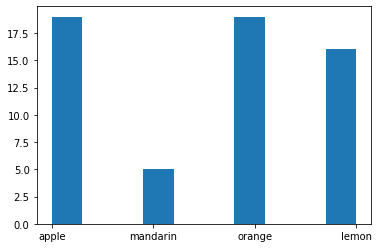

In [5]:
plt.hist(fruits['fruit_name'])

In [6]:
corr = fruits.corr().round(2)

In [7]:
print(corr)

             fruit_label  mass  width  height  color_score
fruit_label         1.00  0.03  -0.30    0.51        -0.31
mass                0.03  1.00   0.88    0.61        -0.08
width              -0.30  0.88   1.00    0.40        -0.08
height              0.51  0.61   0.40    1.00        -0.25
color_score        -0.31 -0.08  -0.08   -0.25         1.00


In [22]:
from sklearn.model_selection import train_test_split
feature_names = ['mass' , 'width' , 'height' , 'color_score']
x=fruits[feature_names]
y = fruits['fruit_label']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9545454545454546

In [25]:
y_test_pre = knn.predict(x_test)

In [27]:
knn.score(x_test,y_test)

0.8

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pre))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pre)

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [2, 0, 5, 1],
       [0, 0, 0, 2]])